In [15]:
import numpy as np
import pandas as pd
import datetime as dt
import random
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
%matplotlib inline  

In [243]:
# df = pd.read_csv('all_currencies.csv')
# df['daily_percent'] = ''
# max_market_cap = df.groupby('Symbol')['Market Cap'].last()
# last_date_df = df[df['Date']=='2018-09-27']
# top_curr = last_date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:50]
# top_curr = list(top_curr)
# len(top_curr)

In [244]:
# df1 = df.copy()

In [245]:
# df1 = df1[df1['Symbol'].isin(top_curr)]
# df1.reset_index(inplace=True, drop=True)
# max_index = max(df1.index)

# for c in top_curr:
#     print(c)
#     for index, row in df1.iterrows():
#         if(index==max_index):
#             continue
# #         if(np.mod(index,100)==0):
# #             print(index)
#         if(row['Symbol']==c):
#             df1.at[index+1,'daily_percent'] = 100*(df1['Close'][index+1]-df1['Close'][index])/df1['Close'][index+1]

In [443]:
df = pd.read_csv('all_currencies.csv')
df['daily_percent'] = ''
df['Date'] = pd.to_datetime(df['Date'])
start_train = dt.datetime(2018, 1, 1)
end_train = dt.datetime(2018, 3, 1)
end_test = dt.datetime(2018, 4, 1)

date_df = df[df['Date']==end_train]
top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
top_curr = list(top_curr)
df = df[df['Symbol'].isin(top_curr)]

df.reset_index(inplace=True, drop=True)
max_index = max(df.index)

for c in top_curr:
    print(c)
    for index, row in df.iterrows():
        if(index==max_index):
            continue
        if(row['Symbol']==c):
            df.at[index+1,'daily_percent'] = 100*(df['Close'][index+1]-df['Close'][index])/df['Close'][index+1]



BTC
ETH
XRP
BCH
LTC
NEO
ADA
XLM
EOS
MIOTA
DASH
XMR
XEM
ETC
TRX
QTUM
NANO
BTG
LSK
ICX
ZEC
BCN
STEEM
XVG
STRAT
DOGE
WAVES
SC
BTS
DCR


In [455]:
df = df[df['daily_percent']!='']
df['Date'] = pd.to_datetime(df['Date'])
start_train1 = dt.datetime(2018, 1, 1)
end_train1 = dt.datetime(2018, 3, 1)
end_test1 = dt.datetime(2018, 4, 1)

date_df = df[df['Date']==end_train1]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# df1 = df1[df1['Symbol'].isin(top_curr)]

df_train_period1 = df[df['Date']>=start_train1].copy()
df_train_period1 = df_train_period1[df_train_period1['Date']<end_train1]
df_train_period1.reset_index(inplace=True, drop=True)

# make small dataframe for storing market cap on last date
market_caps1 = date_df.sort_values(by='Market Cap', ascending=False).copy()[0:30]
market_caps1 = market_caps1[['Symbol', 'Market Cap']]
market_caps1.sort_values(by='Symbol', inplace=True)
market_caps1.reset_index(inplace=True, drop=True)
market_caps1.rename({'Symbol': 'symbol', 'Market Cap': 'market_cap'}, axis='columns', inplace=True)

df_test_period1 = df[df['Date']>end_train1].copy()
df_test_period1 = df_test_period1[df_test_period1['Date']<end_test1]
df_test_period1.reset_index(inplace=True, drop=True)


df2_train_period1 = df_train_period1.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_train_period1 = df2_train_period1.fillna(value=0)
df2_test_period1 = df_test_period1.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_test_period1 = df2_test_period1.fillna(value=0)
df2_test_period1

Symbol,ADA,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DOGE,EOS,...,STEEM,STRAT,TRX,WAVES,XEM,XLM,XMR,XRP,XVG,ZEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-02,-3.711363,-1.312756,-7.197232,1.221316,-1.701289,-4.140879,-2.302735,1.376317,-13.371032,-6.674907,...,-2.388060,5.472637,7.743593,0.598802,-5.336080,-6.000181,8.902619,-2.000013,2.645097,-3.207508
2018-03-03,1.212362,-0.377840,-1.832276,3.510100,0.062640,-6.119011,1.128546,0.037184,-3.414450,-1.125000,...,8.469945,2.781137,-8.236232,3.188406,-4.548545,8.584736,2.328942,-0.257765,-7.228442,-0.043852
2018-03-04,1.223790,1.450647,0.187573,0.198912,1.176158,4.855814,1.605209,-0.062012,3.653217,2.200489,...,-3.098592,0.600962,-2.336771,-0.583090,-5.976711,3.249800,4.341816,10.118416,1.087860,5.282318
2018-03-05,-1.063429,-1.660055,5.953693,0.524483,-1.846348,-6.299246,-0.960005,2.124302,-5.442698,-1.614907,...,-1.139601,-2.337023,-2.191295,-1.629630,-0.896510,-2.811968,1.146685,-5.277641,-3.863678,-4.445352
2018-03-06,-4.298125,-5.139962,-14.375788,-7.359994,-7.660235,-13.337671,-6.234983,-13.004115,-13.188720,-11.034483,...,-8.333333,-10.762943,-6.410665,-9.223301,-4.221864,-4.178615,-7.751155,-3.952922,-10.821541,-1.935333
2018-03-07,-15.397867,-10.427044,-16.858238,-8.171434,-12.587336,-7.034621,-12.607545,-9.164420,-14.562624,-11.367127,...,-16.967509,-18.196457,-13.877879,0.483092,-14.178228,-2.676366,-2.137697,-5.931635,-13.495090,-10.601876
2018-03-08,-11.516936,-4.994184,-2.911738,-6.073011,-4.961613,-7.060236,-4.033858,-13.823078,0.024845,-5.000000,...,-4.528302,-6.701031,-5.973919,-5.792164,13.051610,-5.502696,-21.716193,-5.491629,-11.223913,-9.168002
2018-03-09,0.208814,2.512605,2.224199,-0.615365,-1.796337,1.946774,1.137137,4.008508,2.918476,-1.141925,...,-3.112840,-2.105263,1.503475,0.170068,-1.054811,-0.025332,3.280225,2.813026,0.813215,-2.392668
2018-03-10,-5.876887,-6.072987,-6.204724,-5.318633,-5.345294,-4.538817,-3.127903,-0.361248,-4.354392,-5.689655,...,-7.083333,-6.343284,-5.877806,-5.945946,1.127151,-6.559808,-12.079832,-6.669872,-7.509524,-7.777893


In [468]:
# df = df[df['daily_percent']!='']
# df['Date'] = pd.to_datetime(df['Date'])
start_train2 = dt.datetime(2018, 2, 1)
end_train2 = dt.datetime(2018, 4, 1)
end_test2 = dt.datetime(2018, 5, 1)

date_df = df[df['Date']==end_train2]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# df1 = df1[df1['Symbol'].isin(top_curr)]

df_train_period2 = df[df['Date']>=start_train2].copy()
df_train_period2 = df_train_period2[df_train_period2['Date']<end_train2]
df_train_period2.reset_index(inplace=True, drop=True)

# make small dataframe for storing market cap on last date
market_caps2 = date_df.sort_values(by='Market Cap', ascending=False).copy()[0:100]
market_caps2 = market_caps2[['Symbol', 'Market Cap']]
market_caps2.sort_values(by='Symbol', inplace=True)
market_caps2.reset_index(inplace=True, drop=True)
market_caps2.rename({'Symbol': 'symbol', 'Market Cap': 'market_cap'}, axis='columns', inplace=True)

df_test_period2 = df[df['Date']>end_train2].copy()
df_test_period2 = df_test_period2[df_test_period2['Date']<end_test2]
df_test_period2.reset_index(inplace=True, drop=True)


df2_train_period2 = df_train_period2.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_train_period2 = df2_train_period2.fillna(value=0)
df2_test_period2 = df_test_period2.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_test_period2 = df2_test_period2.fillna(value=0)
df2_test_period2

Symbol,ADA,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DOGE,EOS,...,STEEM,STRAT,TRX,WAVES,XEM,XLM,XMR,XRP,XVG,ZEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,3.591777,2.978409,1.279123,3.381942,4.005589,13.251658,6.503961,5.842912,2.788702,3.904924,...,14.792899,7.650273,10.076912,7.180851,7.985950,8.135967,1.126697,3.117111,8.558822,5.884780
2018-04-03,9.314166,7.029234,6.652452,4.993354,8.579945,2.817337,8.250699,11.111111,6.140940,3.915171,...,17.961165,9.629630,-2.741301,7.160494,12.958204,4.587787,6.346945,10.278043,32.782346,5.960811
2018-04-04,-11.001184,-9.808996,-10.874704,-8.787337,-11.303318,-10.550926,-13.340003,-10.932704,-7.581227,-6.980803,...,-7.291667,-13.445378,-15.479825,-12.188366,-14.648348,-15.473671,-11.428571,-11.245916,-25.109908,-12.420938
2018-04-05,-4.435392,-0.489134,-1.099426,-0.622039,-1.466699,4.777930,0.596718,3.000458,-2.063375,10.468750,...,-9.714286,-0.847458,24.686360,-1.404494,-1.163867,-3.116096,1.852172,-1.175875,-3.520717,0.655436
2018-04-06,-2.981634,-5.833593,-3.206709,-2.639264,-4.998738,-4.381577,-5.675250,0.455996,-1.647940,-8.658744,...,0.568182,-0.283286,-8.386153,-5.014749,-2.587415,-2.391409,-6.981481,-4.065646,6.071850,-5.113022
2018-04-07,2.918800,4.672445,4.296506,3.975784,3.765792,2.710153,4.147079,12.192192,4.710921,0.338409,...,6.382979,5.614973,0.393913,4.507042,1.735227,4.231667,4.773101,2.344081,9.256932,3.399153
2018-04-08,4.984068,2.275433,2.486188,1.600764,2.232779,1.085785,4.198166,-0.321350,1.442139,1.005025,...,1.570681,0.531915,1.509354,2.472527,5.317423,2.189197,2.213025,2.504207,4.882152,1.136487
2018-04-09,-2.281426,-2.861718,-2.743614,-3.733571,-2.184466,-4.135973,-4.172252,-3.599667,-2.895404,-1.703578,...,-4.371585,-5.027933,-5.246672,-4.899135,-2.704447,-4.583116,-4.130005,-1.736894,13.256606,-3.658193
2018-04-10,2.072953,1.938056,9.735269,0.936829,-0.782779,3.196696,0.137211,5.783180,9.201446,2.166667,...,1.081081,4.021448,3.173744,3.878116,2.579039,1.008809,-0.905961,0.015449,7.153215,1.285333


In [469]:
df = df[df['daily_percent']!='']
df['Date'] = pd.to_datetime(df['Date'])
start_train3 = dt.datetime(2018, 3, 1)
end_train3 = dt.datetime(2018, 5, 1)
end_test3 = dt.datetime(2018, 6, 1)

date_df = df[df['Date']==end_train3]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# df1 = df1[df1['Symbol'].isin(top_curr)]

df_train_period3 = df[df['Date']>=start_train3].copy()
df_train_period3 = df_train_period3[df_train_period3['Date']<end_train3]
df_train_period3.reset_index(inplace=True, drop=True)

# make small dataframe for storing market cap on last date
market_caps3 = date_df.sort_values(by='Market Cap', ascending=False).copy()[0:100]
market_caps3 = market_caps3[['Symbol', 'Market Cap']]
market_caps3.sort_values(by='Symbol', inplace=True)
market_caps3.reset_index(inplace=True, drop=True)
market_caps3.rename({'Symbol': 'symbol', 'Market Cap': 'market_cap'}, axis='columns', inplace=True)

df_test_period3 = df[df['Date']>end_train3].copy()
df_test_period3 = df_test_period3[df_test_period3['Date']<end_test3]
df_test_period3.reset_index(inplace=True, drop=True)

df2_train_period3 = df_train_period3.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_train_period3 = df2_train_period3.fillna(value=0)
df2_test_period3 = df_test_period3.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_test_period3 = df2_test_period3.fillna(value=0)
df2_train_period3

Symbol,ADA,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DOGE,EOS,...,STEEM,STRAT,TRX,WAVES,XEM,XLM,XMR,XRP,XVG,ZEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-01,-2.688594,6.792990,3.550678,5.050680,0.352175,7.652183,5.382734,6.449585,3.169751,2.549247,...,4.373178,3.289474,11.253506,5.271084,3.471753,1.590857,9.024328,2.559819,8.269092,4.559308
2018-03-02,-3.711363,-1.312756,-7.197232,1.221316,-1.701289,-4.140879,-2.302735,1.376317,-13.371032,-6.674907,...,-2.388060,5.472637,7.743593,0.598802,-5.336080,-6.000181,8.902619,-2.000013,2.645097,-3.207508
2018-03-03,1.212362,-0.377840,-1.832276,3.510100,0.062640,-6.119011,1.128546,0.037184,-3.414450,-1.125000,...,8.469945,2.781137,-8.236232,3.188406,-4.548545,8.584736,2.328942,-0.257765,-7.228442,-0.043852
2018-03-04,1.223790,1.450647,0.187573,0.198912,1.176158,4.855814,1.605209,-0.062012,3.653217,2.200489,...,-3.098592,0.600962,-2.336771,-0.583090,-5.976711,3.249800,4.341816,10.118416,1.087860,5.282318
2018-03-05,-1.063429,-1.660055,5.953693,0.524483,-1.846348,-6.299246,-0.960005,2.124302,-5.442698,-1.614907,...,-1.139601,-2.337023,-2.191295,-1.629630,-0.896510,-2.811968,1.146685,-5.277641,-3.863678,-4.445352
2018-03-06,-4.298125,-5.139962,-14.375788,-7.359994,-7.660235,-13.337671,-6.234983,-13.004115,-13.188720,-11.034483,...,-8.333333,-10.762943,-6.410665,-9.223301,-4.221864,-4.178615,-7.751155,-3.952922,-10.821541,-1.935333
2018-03-07,-15.397867,-10.427044,-16.858238,-8.171434,-12.587336,-7.034621,-12.607545,-9.164420,-14.562624,-11.367127,...,-16.967509,-18.196457,-13.877879,0.483092,-14.178228,-2.676366,-2.137697,-5.931635,-13.495090,-10.601876
2018-03-08,-11.516936,-4.994184,-2.911738,-6.073011,-4.961613,-7.060236,-4.033858,-13.823078,0.024845,-5.000000,...,-4.528302,-6.701031,-5.973919,-5.792164,13.051610,-5.502696,-21.716193,-5.491629,-11.223913,-9.168002
2018-03-09,0.208814,2.512605,2.224199,-0.615365,-1.796337,1.946774,1.137137,4.008508,2.918476,-1.141925,...,-3.112840,-2.105263,1.503475,0.170068,-1.054811,-0.025332,3.280225,2.813026,0.813215,-2.392668


In [470]:
df = df[df['daily_percent']!='']
df['Date'] = pd.to_datetime(df['Date'])
start_train4 = dt.datetime(2018, 4, 1)
end_train4 = dt.datetime(2018, 6, 1)
end_test4 = dt.datetime(2018, 7, 1)

date_df = df[df['Date']==end_train4]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# df1 = df1[df1['Symbol'].isin(top_curr)]

df_train_period4 = df[df['Date']>=start_train4].copy()
df_train_period4 = df_train_period4[df_train_period4['Date']<end_train4]
df_train_period4.reset_index(inplace=True, drop=True)

# make small dataframe for storing market cap on last date
market_caps4 = date_df.sort_values(by='Market Cap', ascending=False).copy()[0:100]
market_caps4 = market_caps4[['Symbol', 'Market Cap']]
market_caps4.sort_values(by='Symbol', inplace=True)
market_caps4.reset_index(inplace=True, drop=True)
market_caps4.rename({'Symbol': 'symbol', 'Market Cap': 'market_cap'}, axis='columns', inplace=True)

df_test_period4 = df[df['Date']>end_train4].copy()
df_test_period4 = df_test_period4[df_test_period4['Date']<end_test4]
df_test_period4.reset_index(inplace=True, drop=True)


df2_train_period4 = df_train_period4.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_train_period4 = df2_train_period4.fillna(value=0)
df2_test_period4 = df_test_period4.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_test_period4 = df2_test_period4.fillna(value=0)
df2_test_period4

Symbol,ADA,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DOGE,EOS,...,STEEM,STRAT,TRX,WAVES,XEM,XLM,XMR,XRP,XVG,ZEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-02,2.298654,7.546231,-1.604278,1.334476,3.197354,7.789471,1.891547,6.060310,3.794266,16.485753,...,4.016064,3.303965,4.048444,3.703704,3.437435,2.811875,3.141715,3.121761,5.274008,3.890507
2018-06-03,0.180580,7.315448,0.780275,0.994786,2.452140,3.859021,2.946949,-3.662114,3.577236,-0.820793,...,1.968504,2.783726,1.281100,1.369863,0.109480,1.485250,3.956304,4.134951,4.450698,1.093220
2018-06-04,-6.608041,-5.841924,-7.643205,-2.738450,-5.157204,-5.327438,-4.512607,1.150000,-4.473386,-7.896679,...,-8.085106,-7.356322,-4.729718,-6.310680,-5.720270,-3.680885,-5.784246,-1.478626,-8.076943,-7.146482
2018-06-05,2.927876,4.084518,3.454428,1.562664,3.218039,2.228525,0.166971,1.136925,3.338807,4.577465,...,0.000000,3.547672,2.307807,4.629630,1.056440,0.732214,4.246665,2.302755,0.182140,1.273327
2018-06-06,-2.200064,-1.920136,-2.153744,0.264176,-1.646640,-3.556697,-0.912415,-0.556715,3.512015,-1.865136,...,2.892562,-1.576577,-1.967748,0.000000,-0.550652,1.326320,-1.567341,-0.328691,-1.886695,-1.474264
2018-06-07,-2.179813,1.099891,-1.599057,0.315958,0.088928,0.034249,-0.601273,6.201044,-1.473741,4.455106,...,-4.310345,0.224719,-1.001377,4.845815,1.441222,-1.381005,-0.427064,0.491205,-1.557469,0.526759
2018-06-08,-2.805345,-2.285837,-4.761065,-0.699286,-2.717515,-2.645036,-0.634052,1.397573,-1.995081,-3.917379,...,-1.754386,-4.705882,-2.157111,1.731602,-0.753739,-2.167987,-3.282924,-0.561287,2.219094,0.864770
2018-06-09,-1.616598,-2.386163,0.595968,-1.233938,-1.061620,-2.464315,-3.913043,-4.980695,-1.836905,0.425532,...,-2.242152,-2.905569,-0.734818,-5.479452,-2.682235,-2.152937,-2.413526,-2.211124,-5.920946,-2.879615
2018-06-10,-14.260918,-16.239689,-20.231823,-10.992599,-19.300661,-21.204995,-9.108159,-11.134950,-12.916405,-23.792801,...,-20.540541,-17.663818,-19.069641,-14.960630,-13.518150,-13.823902,-11.074475,-12.179193,-17.362945,-14.233111


In [471]:
df = df[df['daily_percent']!='']
df['Date'] = pd.to_datetime(df['Date'])
start_train5 = dt.datetime(2018, 5, 1)
end_train5 = dt.datetime(2018, 7, 1)
end_test5 = dt.datetime(2018, 8, 1)

date_df = df[df['Date']==end_train5]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# df1 = df1[df1['Symbol'].isin(top_curr)]

df_train_period5 = df[df['Date']>=start_train5].copy()
df_train_period5 = df_train_period5[df_train_period5['Date']<end_train5]
df_train_period5.reset_index(inplace=True, drop=True)

# make small dataframe for storing market cap on last date
market_caps5 = date_df.sort_values(by='Market Cap', ascending=False).copy()[0:100]
market_caps5 = market_caps5[['Symbol', 'Market Cap']]
market_caps5.sort_values(by='Symbol', inplace=True)
market_caps5.reset_index(inplace=True, drop=True)
market_caps5.rename({'Symbol': 'symbol', 'Market Cap': 'market_cap'}, axis='columns', inplace=True)

df_test_period5 = df[df['Date']>end_train5].copy()
df_test_period5 = df_test_period5[df_test_period5['Date']<end_test5]
df_test_period5.reset_index(inplace=True, drop=True)


df2_train_period5 = df_train_period5.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_train_period5 = df2_train_period5.fillna(value=0)
df2_test_period5 = df_test_period5.pivot(columns='Symbol', index='Date', values='daily_percent')
df2_test_period5 = df2_test_period5.fillna(value=0)
df2_train_period5

Symbol,ADA,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DOGE,EOS,...,STEEM,STRAT,TRX,WAVES,XEM,XLM,XMR,XRP,XVG,ZEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,4.286395,0.091025,-3.831635,-1.332820,-2.161785,1.787660,1.280017,-2.315893,-1.283048,7.229551,...,0.254453,6.232687,-0.446658,1.612903,-0.994682,3.427989,-0.915675,0.412286,2.985750,1.841716
2018-05-02,3.685892,7.365361,3.917301,1.265819,5.433922,3.063483,0.537914,-0.171842,2.446425,1.353462,...,3.201970,5.249344,-2.147773,8.579088,3.748743,-0.115202,3.765121,2.058797,1.921442,0.981695
2018-05-03,-0.733279,3.521895,20.547550,5.212924,1.455680,-5.181389,4.337201,2.861571,6.523666,-8.103545,...,-0.246914,0.651890,-4.645065,4.725415,3.093883,-0.422517,-1.496057,2.868624,-2.250759,4.879709
2018-05-04,-2.645052,0.353252,-3.074410,-0.444295,-2.504663,-2.154505,-3.495641,8.568625,-7.060163,-3.615160,...,-3.053435,4.364090,-0.610529,-1.424870,-0.644841,-1.447094,-1.842421,1.225763,0.547701,-3.869599
2018-05-05,1.680415,13.399349,6.706388,1.596547,6.665009,-0.187401,3.834213,-4.631003,-1.718147,3.651685,...,-3.149606,2.314251,0.335239,-5.177112,-1.057750,-0.061503,-0.311488,1.067392,-0.823898,3.059092
2018-05-06,-4.661720,0.769671,-0.375522,-2.106206,-3.380897,-6.198027,-4.222827,-1.941860,-4.225352,-1.888952,...,-2.144772,-3.792668,-2.741277,-5.611511,-1.966673,-4.342235,-2.246380,-3.864824,-5.009222,-5.174604
2018-05-07,-4.429016,-6.675326,-6.235225,-3.006398,-6.024261,-6.240593,-5.945545,2.206050,-3.176251,2.836485,...,-4.775281,-3.805774,-2.036444,-4.354354,-7.162445,-4.357319,-1.038315,-4.657830,0.432037,-3.511640
2018-05-08,-2.078257,-2.683723,77.540320,-1.496402,-2.329149,0.679617,-3.202037,-2.757654,9.164624,0.882029,...,0.835655,-1.464714,-0.018057,-2.147239,-3.276655,-2.415036,-4.351914,-2.293819,-1.949058,-2.231024
2018-05-09,-1.470675,1.611387,0.000000,0.968989,-2.355460,-1.526231,-0.139904,-0.422436,-4.123306,-1.114827,...,-2.865330,-5.477528,-2.549194,2.831595,0.357560,-2.222663,1.832806,-1.487077,2.440274,0.268165


In [472]:
df2_train_periods = [df2_train_period1, df2_train_period2, df2_train_period3, df2_train_period4, df2_train_period5]
df2_test_periods = [df2_test_period1, df2_test_period2, df2_test_period3, df2_test_period4, df2_test_period5]
market_caps = [market_caps1, market_caps2, market_caps3, market_caps4, market_caps5]

In [266]:
mc = []
last_price = []
day_change = []
week_change = []
month_change = []


for c in top_curr:
    df = df_train_period.copy()
    df = df[df['Symbol']==c]
    mc.append(df['Market Cap'].iloc[-1])
    last_price.append(df['Close'].iloc[-1])
    day_change.append(100*(df['Close'].iloc[-1]-df['Close'].iloc[-2])/df['Close'].iloc[-2])
    week_change.append(100*(df['Close'].iloc[-1]-df['Close'].iloc[-7])/df['Close'].iloc[-7])
    month_change.append(100*(df['Close'].iloc[-1]-df['Close'].iloc[-30])/df['Close'].iloc[-30])

    
curr_info = pd.DataFrame(
    {'top_curr': top_curr,
     'mc': mc,
     'last_price': last_price,
     'day_change': day_change,
     'week_change': week_change,
     'month_change': month_change,
    })        
curr_info

,top_curr,mc,last_price,day_change,week_change,month_change
0,BTC,1.805100e+11,10397.900000,-3.055307,3.927036,2.885329
1,ETH,8.593637e+10,855.200000,-2.626755,5.211358,-20.159084
2,XRP,3.693273e+10,0.904583,-4.509846,-3.950464,-20.650614
3,BCH,2.112411e+10,1204.160000,-3.409109,-1.257083,-18.114991
4,LTC,1.203923e+10,202.900000,-6.325023,3.886130,22.761375
5,NEO,9.254661e+09,133.240000,-6.498246,16.795231,-8.914411
6,ADA,8.672232e+09,0.312581,-6.841293,-7.485105,-41.234563
7,XLM,6.656078e+09,0.333916,-7.771005,-8.877409,-31.804888
8,EOS,5.940665e+09,8.410000,-1.866978,3.955501,-27.249135
9,MIOTA,5.478340e+09,1.860000,-5.583756,14.814815,-16.216216


In [222]:
df_price_history = df_train_period.pivot(columns='Symbol', index='Date', values='Close')
df_mc_history = df_train_period.pivot(columns='Symbol', index='Date', values='Market Cap')

print(df_price_history)
print(df_mc_history)

df_price_history.to_csv('price_history.csv')
df_mc_history.to_csv('mc_history.csv')

Symbol           ADA      ARDR      BCH       BCN       BTC     BTG       BTS  \
Date                                                                            
2018-01-01  0.728657  1.610000  2432.54  0.005924  13657.20  272.90  0.768535   
2018-01-02  0.782587  1.840000  2711.00  0.006390  14982.10  277.08  0.792659   
2018-01-03  1.080000  1.950000  2608.69  0.006408  15201.00  270.24  0.891892   
2018-01-04  1.110000  1.780000  2430.18  0.006948  15599.20  273.76  0.843038   
2018-01-05  0.999559  1.550000  2584.48  0.014134  17429.50  277.44  0.775645   
2018-01-06  1.030000  1.700000  2786.65  0.016694  17527.00  300.38  0.833124   
2018-01-07  1.010000  1.820000  2786.88  0.015402  16477.60  302.25  0.817190   
2018-01-08  0.899002  1.570000  2421.47  0.013158  15170.10  239.55  0.764256   
2018-01-09  0.814743  1.530000  2391.56  0.011815  14595.40  240.90  0.688537   
2018-01-10  0.793121  1.590000  2895.38  0.011737  14973.30  243.36  0.633623   
2018-01-11  0.688412  1.3500

In [147]:
# date_df = df_train_period[df_train_period['Date']==start_train]
# top_curr = date_df.sort_values(by='Market Cap', ascending=False)['Symbol'][0:30]
# top_curr = list(top_curr)
# len(top_curr)

market_caps[market_caps['symbol']=='LTC']['market_cap'].values[0]

12639723520.0

In [267]:
def random_weights(n):
    weights = []
    for i in range(n):
        if(i==n-1):
            weights.append(1-sum(weights))
        else:
            high = 1 - sum(weights)
            weights.append(np.random.uniform(high=high))
    return(weights)

def er_and_risk(p, num, weights, df):
    p_er = 0
    p_risk = 0
    #print(num, len(p))
    
    for j in range(num):
        p_er += (weights[j])*np.mean(df[p[j]])
        p_risk += (weights[j])**2*np.var(df[p[j]])
        for k in range(num):
            if(j!=k):
#                 print(len(df[p[k]]))
#                 print(df[p[j]].corr(df[p[k]]))
                p_risk += (weights[j])*(weights[k])*np.std(df[p[j]])*np.std(df[p[k]])*df[p[j]].corr(df[p[k]])
    p_risk = np.sqrt(p_risk)
    
    return p_er, p_risk

In [293]:
df_market_proportions = curr_info[['top_curr', 'mc']].copy()
total_mc = sum(df_market_proportions['mc'])
df_market_proportions['mc_frac'] = df_market_proportions['mc']/total_mc
curr_list_proportional = []

for index, row in df_market_proportions.iterrows():
    num_entries = int(1000*row['mc_frac'])
    for i in range(num_entries):
        curr_list_proportional.append(row['top_curr'])
        
        
curr_list_proportional

# len(curr_list_proportional)

['BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',
 'BTC',


In [835]:
random_portfolios = []
portfolio_weights = []
num_of_cryptos = [3,4,5,6]

num_btc = 0
for i in range(1000):
    num = random.choice(num_of_cryptos)
#     p = []
#     while len(p)<num:
#         add = random.choice(curr_list_proportional)
#         if(add not in p):
#             p.append(add)
#             if(add=='BTC'):
#                 num_btc+=1
    p = random.sample(top_curr, num)
    weights = random_weights(num)

    portfolio_weights.append(weights)
    random_portfolios.append(p)

    
# print(num_btc/1000)
    
random_portfolios

[['WAVES', 'STRAT', 'BTG', 'BCH'],
 ['XRP', 'DASH', 'NEO', 'ICX'],
 ['WAVES', 'MIOTA', 'ZEC'],
 ['TRX', 'XEM', 'STRAT', 'LTC', 'NANO'],
 ['TRX', 'ZEC', 'BCN'],
 ['BCH', 'BTC', 'LSK'],
 ['TRX', 'XVG', 'MIOTA', 'BTS', 'ADA'],
 ['DASH', 'QTUM', 'WAVES'],
 ['XRP', 'ADA', 'SC'],
 ['ZEC', 'MIOTA', 'XRP', 'STEEM'],
 ['ADA', 'XLM', 'SC', 'ZEC', 'ETH', 'TRX'],
 ['EOS', 'ADA', 'DCR', 'XRP'],
 ['MIOTA', 'WAVES', 'ETC', 'BTG', 'BCH'],
 ['XRP', 'DCR', 'DASH'],
 ['STEEM', 'ETC', 'BTC', 'MIOTA', 'ICX', 'BCN'],
 ['DOGE', 'TRX', 'ICX', 'NANO'],
 ['XLM', 'DASH', 'MIOTA', 'ADA'],
 ['BTG', 'LTC', 'BTC', 'BCH', 'LSK', 'STRAT'],
 ['SC', 'XEM', 'BTG', 'BTS', 'BCH'],
 ['NEO', 'XEM', 'BTC', 'LTC', 'BTS', 'WAVES'],
 ['XRP', 'DOGE', 'ETC', 'DASH'],
 ['BTG', 'XMR', 'BTC', 'QTUM'],
 ['XMR', 'STRAT', 'DCR'],
 ['BTC', 'XVG', 'EOS', 'LTC'],
 ['XEM', 'TRX', 'LSK'],
 ['BCH', 'XLM', 'XVG', 'BTC'],
 ['DOGE', 'XRP', 'XEM', 'ETH', 'TRX'],
 ['STRAT', 'BCH', 'TRX'],
 ['NEO', 'TRX', 'STRAT', 'ADA'],
 ['NEO', 'XRP', 'STEEM', '

In [836]:
initial_er = []
initial_risk = []
delta_er = []
delta_risk = []
correlation = []
cointegration = []
addition_er = []
addition_performance = []
addition_std = []
addition_marketcap = []
delta_future_er = []
delta_future_risk = []
did_risk_decrease = []
simple_prediction = []
portfolio_id = []
curr = []
time_chunk = []

for i, portfolio in enumerate(random_portfolios):
    if(np.mod(i,10)==0):
        print(i)
    time = random.choice([0,1,2,3])
    df2_train_period = df2_train_periods[time]
    df2_test_period = df2_test_periods[time]
    market_cap = market_caps[time]
    ini_er, ini_risk = er_and_risk(portfolio, len(portfolio), portfolio_weights[i], df2_train_period)
    future_er, future_risk = er_and_risk(portfolio, len(portfolio), portfolio_weights[i], df2_test_period)
    for c in top_curr:
        if(c in portfolio or c=='BTC'):
            continue
        new_portfolio = portfolio.copy()
        new_portfolio.append(c)
        new_weights = []
        increase = np.random.uniform(low=1.1, high=1.2)
        for w in portfolio_weights[i]:
            new_weights.append(w*(1/increase))
        new_weights.append(1-sum(new_weights))
        num = len(new_portfolio)
        new_er, new_risk = er_and_risk(new_portfolio, num, new_weights, df2_train_period)
        future_new_er, future_new_risk = er_and_risk(new_portfolio, num, new_weights, df2_test_period)
        
        portfolio_id.append(i)
        curr.append(c)
        time_chunk.append(time)
        
        initial_er.append(ini_er)
        initial_risk.append(ini_risk)
        delta_er.append(new_er-ini_er)
        delta_risk.append(new_risk-ini_risk)
        
        addition_er.append(np.mean(df2_train_period[c]))
        addition_std.append(np.std(df2_train_period[c]))
        
        portfolio_performance = pd.Series([])
        for k in range(len(portfolio_weights[i])):
            new = portfolio_weights[i][k]*df2_train_period[portfolio[k]]
            portfolio_performance = portfolio_performance.add(new,fill_value=0)
        
        corr = portfolio_performance.corr(df2_train_period[c])
        coin = ts.coint(portfolio_performance, df2_train_period[c])
        correlation.append(corr)
        cointegration.append(coin[0])
        
        #mc = df_train_period[df_train_period['Symbol']==c]['Market Cap'].iloc[-1]
        mc = market_cap[market_cap['symbol']==c]['market_cap'].values[0]
        addition_marketcap.append(mc)
        delta_future_er.append(future_new_er-future_er)
        delta_future_risk.append(future_new_risk-future_risk)
        if(new_risk < ini_risk and new_er > ini_er):
            simple_prediction.append(1)
        else:
            simple_prediction.append(0)
        if(future_new_risk < future_risk and future_new_er > future_er):
            did_risk_decrease.append(1)
        else:
            did_risk_decrease.append(0) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [837]:
features_test = pd.DataFrame(
    {'portfolio_id': portfolio_id,
     'curr': curr,
     'time_chunk': time_chunk,
     'initial_er': initial_er,
     'initial_risk':initial_risk,
     'delta_er': delta_er,
     'delta_risk': delta_risk,
     'addition_er': addition_er,
     'addition_std': addition_std,
     'correlation': correlation,
     'cointegration': cointegration,
     'addition_marketcap': addition_marketcap,
     'delta_future_er': delta_future_er,
     'delta_future_risk': delta_future_risk,
     'simple_prediction': simple_prediction,
     'did_risk_decrease': did_risk_decrease
     
    })        
features_test

,portfolio_id,curr,time_chunk,initial_er,initial_risk,delta_er,delta_risk,addition_er,addition_std,correlation,cointegration,addition_marketcap,delta_future_er,delta_future_risk,simple_prediction,did_risk_decrease
0,0,ETH,3,0.034076,6.490008,0.045072,-0.185430,0.470211,5.390412,0.859578,-7.089120,5.774565e+10,0.055277,-0.287628,1,1
1,0,XRP,3,0.034076,6.490008,0.011478,-0.212177,0.115170,5.938731,0.818251,-6.065635,2.401924e+10,0.057133,-0.505051,1,1
2,0,LTC,3,0.034076,6.490008,-0.012365,-0.214152,-0.101597,4.970531,0.821208,-6.000949,6.701527e+09,0.003601,-0.262437,0,1
3,0,NEO,3,0.034076,6.490008,-0.025197,-0.174574,-0.121659,6.482573,0.805464,-7.695927,3.457785e+09,-0.112955,-0.428716,0,0
4,0,ADA,3,0.034076,6.490008,0.027711,-0.051430,0.325977,7.288443,0.796454,-7.967185,5.821494e+09,-0.029623,-0.242078,1,0
5,0,XLM,3,0.034076,6.490008,0.053727,-0.119496,0.363932,6.705983,0.831938,-7.124729,5.509346e+09,-0.004893,-0.466649,1,0
6,0,EOS,3,0.034076,6.490008,0.121939,-0.152783,0.791572,8.449913,0.584541,-7.464417,1.095670e+10,-0.042145,-0.040905,1,0
7,0,MIOTA,3,0.034076,6.490008,0.053938,-0.014531,0.488757,7.680003,0.804209,-7.214380,4.883296e+09,-0.115045,-0.169408,1,0
8,0,DASH,3,0.034076,6.490008,-0.024742,-0.217570,-0.160759,5.712470,0.816931,-7.325752,2.470670e+09,0.056156,-0.492435,0,1
9,0,XMR,3,0.034076,6.490008,-0.044097,-0.227391,-0.389553,5.549388,0.756085,-4.160093,2.507870e+09,0.072004,-0.276764,0,1


In [772]:
features_train['simple_risk_top5'] = 0
features_train['simple_risk_top1'] = 0

features_train['simple_er_top5'] = 0
features_train['simple_er_top1'] = 0

features_train['future_risk_top5'] = 0
features_train['future_risk_top1'] = 0

features_train['future_er_top5'] = 0
features_train['future_er_top1'] = 0

for i in range(len(random_portfolios)):
    if(np.mod(i, 100)==0):
        print(i)
    portfolio_i = features_train[features_train['portfolio_id']==i].copy()
    portfolio_i = portfolio_i[portfolio_i['delta_er']>0]
    portfolio_i = portfolio_i[portfolio_i['delta_risk']<0]
    
    if(len(portfolio_i)==0):
        continue
        
    portfolio_i.sort_values(by='delta_risk', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_train.at[j, 'simple_risk_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_train.at[portfolio_i.index[0], 'simple_risk_top1'] = 1
    
    portfolio_i.sort_values(by='delta_er', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_train.at[j, 'simple_er_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_train.at[portfolio_i.index[0], 'simple_er_top1'] = 1
    
#     if(np.mod(i, 100)==0):
#         print(i)
    portfolio_i = features_train[features_train['portfolio_id']==i].copy()
    portfolio_i = portfolio_i[portfolio_i['delta_future_er']>0]
    portfolio_i = portfolio_i[portfolio_i['delta_future_risk']<0]
    
    if(len(portfolio_i)==0):
        continue
        
    portfolio_i.sort_values(by='delta_future_risk', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_train.at[j, 'future_risk_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_train.at[portfolio_i.index[0], 'future_risk_top1'] = 1
    
    portfolio_i.sort_values(by='delta_future_er', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_train.at[j, 'future_er_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_train.at[portfolio_i.index[0], 'future_er_top1'] = 1    
    




0
100
200
300
400
500
600
700
800
900


In [838]:
features_test['simple_risk_top5'] = 0
features_test['simple_risk_top1'] = 0

features_test['simple_er_top5'] = 0
features_test['simple_er_top1'] = 0

features_test['future_risk_top5'] = 0
features_test['future_risk_top1'] = 0

features_test['future_er_top5'] = 0
features_test['future_er_top1'] = 0

for i in range(len(random_portfolios)):
    if(np.mod(i, 10)==0):
        print(i)
    portfolio_i = features_test[features_test['portfolio_id']==i].copy()
    portfolio_i = portfolio_i[portfolio_i['delta_er']>0]
    portfolio_i = portfolio_i[portfolio_i['delta_risk']<0]
    
    if(len(portfolio_i)==0):
        continue
        
    portfolio_i.sort_values(by='delta_risk', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_test.at[j, 'simple_risk_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_test.at[portfolio_i.index[0], 'simple_risk_top1'] = 1
    
    portfolio_i.sort_values(by='delta_er', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_test.at[j, 'simple_er_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_test.at[portfolio_i.index[0], 'simple_er_top1'] = 1
    
    portfolio_i = features_test[features_test['portfolio_id']==i].copy()
    portfolio_i = portfolio_i[portfolio_i['delta_future_er']>0]
    portfolio_i = portfolio_i[portfolio_i['delta_future_risk']<0]
    
    if(len(portfolio_i)==0):
        continue
        
    portfolio_i.sort_values(by='delta_future_risk', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_test.at[j, 'future_risk_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_test.at[portfolio_i.index[0], 'future_risk_top1'] = 1
    
    portfolio_i.sort_values(by='delta_future_er', inplace=True)
    for j in portfolio_i.index[0:5]:
        features_test.at[j, 'future_er_top5'] = 1
    #print(i, portfolio_i.index[0])
    features_test.at[portfolio_i.index[0], 'future_er_top1'] = 1    
    


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [839]:
print(len(features_train))
print(sum(features_train['future_risk_top5']))
print(sum(features_train['future_risk_top5'])/len(features_train))

print(len(features_test))
print(sum(features_test['future_risk_top5']))
print(sum(features_test['future_risk_top5'])/len(features_test))
features_test

24599
4180
0.16992560673198098
24661
4226
0.17136369165889462


,portfolio_id,curr,time_chunk,initial_er,initial_risk,delta_er,delta_risk,addition_er,addition_std,correlation,...,simple_prediction,did_risk_decrease,simple_risk_top5,simple_risk_top1,simple_er_top5,simple_er_top1,future_risk_top5,future_risk_top1,future_er_top5,future_er_top1
0,0,ETH,3,0.034076,6.490008,0.045072,-0.185430,0.470211,5.390412,0.859578,...,1,1,0,0,0,0,1,0,0,0
1,0,XRP,3,0.034076,6.490008,0.011478,-0.212177,0.115170,5.938731,0.818251,...,1,1,1,0,1,0,1,0,0,0
2,0,LTC,3,0.034076,6.490008,-0.012365,-0.214152,-0.101597,4.970531,0.821208,...,0,1,0,0,0,0,0,0,1,0
3,0,NEO,3,0.034076,6.490008,-0.025197,-0.174574,-0.121659,6.482573,0.805464,...,0,0,0,0,0,0,0,0,0,0
4,0,ADA,3,0.034076,6.490008,0.027711,-0.051430,0.325977,7.288443,0.796454,...,1,0,0,0,1,0,0,0,0,0
5,0,XLM,3,0.034076,6.490008,0.053727,-0.119496,0.363932,6.705983,0.831938,...,1,0,0,0,0,0,0,0,0,0
6,0,EOS,3,0.034076,6.490008,0.121939,-0.152783,0.791572,8.449913,0.584541,...,1,0,0,0,0,0,0,0,0,0
7,0,MIOTA,3,0.034076,6.490008,0.053938,-0.014531,0.488757,7.680003,0.804209,...,1,0,0,0,0,0,0,0,0,0
8,0,DASH,3,0.034076,6.490008,-0.024742,-0.217570,-0.160759,5.712470,0.816931,...,0,1,0,0,0,0,1,0,0,0
9,0,XMR,3,0.034076,6.490008,-0.044097,-0.227391,-0.389553,5.549388,0.756085,...,0,1,0,0,0,0,0,0,0,0


In [840]:
# X = features[['curr', 'initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
#               'addition_er', 'addition_std', 'correlation', 'cointegration', 'addition_marketcap',
#               'simple_top5', 'delta_future_risk', 'delta_future_er']]
# y = features['future_top5']

X_train = features_train[['curr', 'initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
              'correlation', 'cointegration',
              'simple_risk_top5', 'delta_future_risk', 'delta_future_er']]
y_train = features_train['future_risk_top5']

In [841]:
X_test = features_test[['curr', 'initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
              'correlation', 'cointegration',
              'simple_risk_top5', 'delta_future_risk', 'delta_future_er']]
y_test = features_test['future_risk_top5']

In [842]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X_train_with_curr, X_test_with_curr, y_train, y_test = train_test_split(X, y, random_state = 0)

y_test_simple5 = X_test['simple_risk_top5']

# X_train = X_train_with_curr[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
#               'addition_er', 'addition_std', 'correlation', 'cointegration', 'addition_marketcap']]
# X_test = X_test_with_curr[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
#               'addition_er', 'addition_std', 'correlation', 'cointegration', 'addition_marketcap']]

# X_train = X_train_with_curr[['delta_er', 'delta_risk', 
#              'correlation', 'cointegration']]
# X_test = X_test_with_curr[['delta_er', 'delta_risk', 
#              'correlation', 'cointegration']]

X_train = X_train[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
             'correlation', 'cointegration']]
X_test = X_test[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
             'correlation', 'cointegration']]

# X_train = X_train[['delta_er', 'delta_risk', 
#              'cointegration']]
# X_test = X_test[['delta_er', 'delta_risk', 
#              'cointegration']]



scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [805]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=5, max_depth=8,random_state=47).fit(X_train, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted_rf = rf_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted_rf)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted_rf)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted_rf)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted_rf)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted_rf)))
confusion = confusion_matrix(y_test, y_predicted_rf)
print(confusion)
print('Feature importances: {}'.format(rf_clf.feature_importances_))

rf_feature_importances = rf_clf.feature_importances_

rf_accuracy = accuracy_score(y_test, y_predicted_rf)
rf_precision = precision_score(y_test, y_predicted_rf)

Recall: 0.104
Precision: 0.585
Accuracy: 0.843
F1: 0.176
[[4088   59]
 [ 718   83]]
Feature importances: [0.097 0.194 0.105 0.321 0.206 0.076]


In [632]:
import pickle

filename = 'rf_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

In [828]:
y_pred_thresh

list

In [829]:
features_test['y_pred_thresh'] = y_pred_thresh

curr_predicted = features_test[features_test['y_pred_thresh']==1]['curr']
# sum(curr_predicted=='LTC')

sug_freq = []

for c in top_curr:
    sug_freq.append(sum(curr_predicted==c))
    
df_sug_freq = pd.DataFrame(
    {'top_curr': top_curr,
     'sug_freq': sug_freq,
     'mc': list(curr_info['mc'])
    })        
df_sug_freq.sort_values(by='sug_freq', inplace=True, ascending=False)
df_sug_freq

,top_curr,sug_freq,mc
1,ETH,110,8.593637e+10
10,DASH,94,4.864747e+09
4,LTC,70,1.203923e+10
20,ZEC,56,1.378076e+09
2,XRP,35,3.693273e+10
22,STEEM,31,8.757651e+08
9,MIOTA,29,5.478340e+09
26,WAVES,28,6.618966e+08
7,XLM,25,6.656078e+09
6,ADA,22,8.672232e+09


1     10.934177
10     9.687060
4     10.080599
20     9.139273
2     10.567411
22     8.942388
9      9.738649
26     8.820790
7      9.823218
6      9.938131
11     9.677179
5      9.966361
21     8.967936
3     10.324778
15     9.314934
13     9.557050
25     8.851796
28     8.759483
29     8.726151
12     9.557084
17     9.307100
24     8.886756
8      9.773835
19     9.191177
18     9.312881
16     9.310677
23     8.944719
14     9.448680
27     8.856417
0     11.256501
Name: mc, dtype: float64


Text(0, 0.5, 'Test Set Suggestion Frequency')

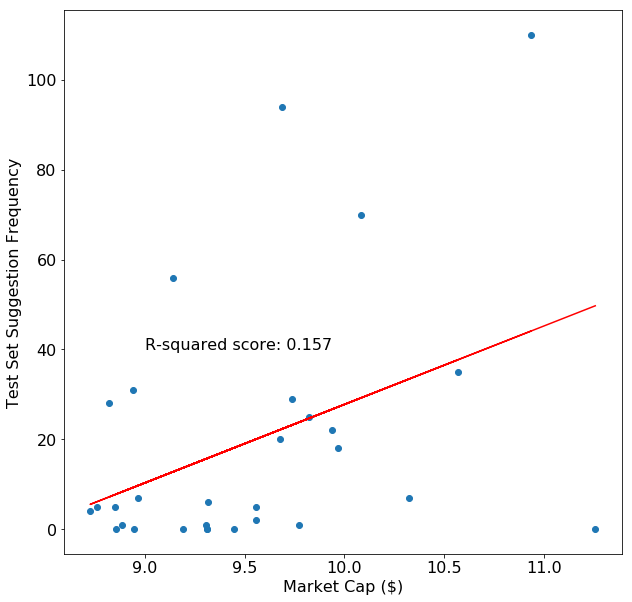

In [831]:
from sklearn.linear_model import LinearRegression

fig, ax1 = plt.subplots(figsize = (10,10))

x = np.log10(df_sug_freq['mc'])
y = df_sug_freq['sug_freq']

ax1.scatter(x, y)
print(x)

x = x.values.reshape(-1,1)

linreg = LinearRegression().fit(x, y)
ax1.plot(x, linreg.coef_ * x + linreg.intercept_, 'r-')
ax1.text(9,40,'R-squared score: {:.3f}'
     .format(linreg.score(x, y)))
ax1.set_xlabel('Market Cap ($)')
ax1.set_ylabel('Test Set Suggestion Frequency')

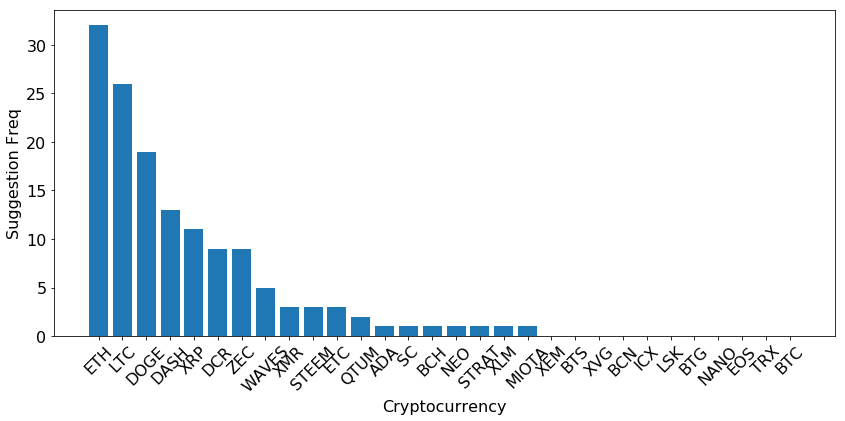

In [786]:
fig, ax1 = plt.subplots(figsize = (14,6))

x = df_sug_freq['top_curr']#.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),df_sug_freq['sug_freq'], align='center')

ax1.set_xlabel('Cryptocurrency')
ax1.set_ylabel('Suggestion Freq')

# plt.savefig('plots/suggestion_frequency_test_set.png',format='png')

plt.show()



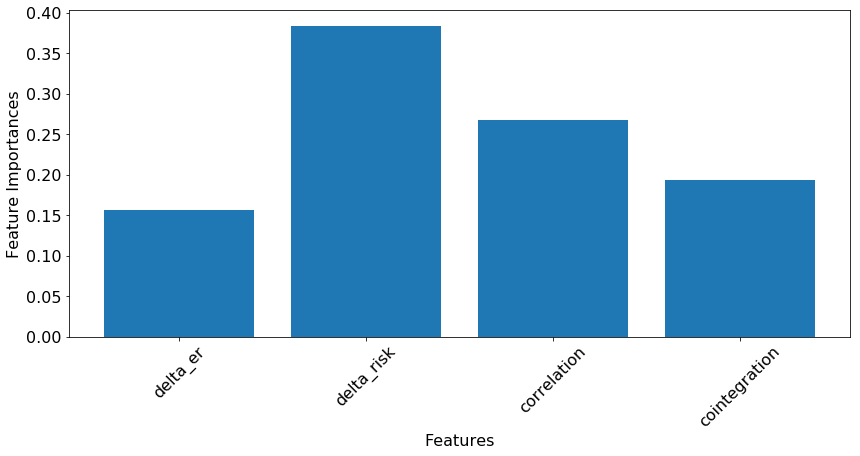

In [633]:
fig, ax1 = plt.subplots(figsize = (14,6))

x = ['delta_er', 'delta_risk', 
              'correlation', 'cointegration']

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),rf_feature_importances, align='center')

ax1.set_xlabel('Features')
ax1.set_ylabel('Feature Importances')

# plt.savefig('plots/suggestion_frequency_test_set.pdf',format='pdf')

plt.show()



In [223]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=47)


X_crossval = features[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
              'addition_er', 'addition_std', 'correlation', 'cointegration', 'addition_marketcap']]
y_crossval = features['future_top5']

print('Cross-validation (accuracy)', cross_val_score(rf_clf, X_crossval, y_crossval, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(rf_clf, X_crossval, y_crossval, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(rf_clf, X_crossval, y_crossval, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (recall)', cross_val_score(rf_clf, X_crossval, y_crossval, cv=5, scoring = 'precision'))

Cross-validation (accuracy) [0.922 0.924 0.925 0.920 0.924]
Cross-validation (AUC) [0.962 0.965 0.965 0.960 0.965]
Cross-validation (recall) [0.729 0.741 0.737 0.726 0.732]
Cross-validation (recall) [0.812 0.816 0.819 0.802 0.823]


In [843]:
confusion = confusion_matrix(y_test, y_test_simple5)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_test_simple5)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_test_simple5)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_simple5)))
print('F1: {:.3f}'.format(f1_score(y_test, y_test_simple5)))
confusion = confusion_matrix(y_test, y_test_simple5)
print(confusion)

stat_accuracy = accuracy_score(y_test, y_test_simple5)
stat_precision = precision_score(y_test, y_test_simple5)

Recall: 0.255
Precision: 0.242
Accuracy: 0.735
F1: 0.248
[[17059  3376]
 [ 3149  1077]]


In [844]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

print('Recall: {:.3f}'.format(recall_score(y_test, y_dummy_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_dummy_predictions)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_dummy_predictions)))
print('F1: {:.3f}'.format(f1_score(y_test, y_dummy_predictions)))
confusion = confusion_matrix(y_test, y_dummy_predictions)
print(confusion)

dummy_accuracy = accuracy_score(y_test, y_dummy_predictions)
dummy_precision = precision_score(y_test, y_dummy_predictions)

Recall: 0.164
Precision: 0.168
Accuracy: 0.717
F1: 0.166
[[16988  3447]
 [ 3531   695]]


In [794]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

lr = LogisticRegression(solver='lbfgs')
grid_values = {'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'precision').fit(X_train_scaled, y_train)
print(grid_lr.cv_results_['mean_test_score'].reshape(9,1))

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

[[0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.457]
 [0.342]
 [0.380]
 [0.376]
 [0.376]]


In [845]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', C=1000).fit(X_train_scaled, y_train)

y_predicted_lr = lr.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted_lr)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted_lr)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted_lr)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted_lr)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted_lr)))
confusion = confusion_matrix(y_test, y_predicted_lr)
print(confusion)
print('Coefficients: {}'.format(lr.coef_))

Recall: 0.019
Precision: 0.371
Accuracy: 0.826
F1: 0.036
[[20301   134]
 [ 4147    79]]
Coefficients: [[-1.199 -5.810 -2.197 -20.734 4.867 -0.219]]


In [846]:
y_scores = lr.decision_function(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
roc_auc

0.7196081766769175

In [806]:
filename = 'lr_model.sav'
pickle.dump(lr, open(filename, 'wb'))

lr = pickle.load(open('lr_model.sav', 'rb'))
print(type(lr))

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [847]:
# pred_proba_df = lr.predict_proba(X_test)[:,1]
# threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
# for i in threshold_list:
#     print ('\n******** For i = {} ******'.format(i))
#     y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
#     test_accuracy = accuracy_score(y_test,y_test_pred)
#     print('Our testing accuracy is {}'.format(test_accuracy))

#     print(confusion_matrix(y_test,y_test_pred))


y_scores = lr.predict_proba(X_test_scaled)[:,1] 
# y_scores = lr.decision_function(X_test) 
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
print(len(precision), len(recall), len(thresholds))

pred_proba_df = pd.DataFrame(
    {'precision': precision,
     'recall': recall
     
    })        
pred_proba_df.to_csv('pred_proba_lr.csv', sep='\t')

24437 24437 24436


In [848]:
print(thresholds[4325])
y_scores = lr.predict_proba(X_test_scaled)[:,1] 
y_scores

0.07117435857878043


array([0.262, 0.248, 0.263, ..., 0.119, 0.113, 0.139])

In [850]:
thresh = 0.28

y_pred_thresh = []
for s in y_scores:
    if(s>thresh):
        y_pred_thresh.append(1)
    else:
        y_pred_thresh.append(0)
        
        
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred_thresh)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred_thresh)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred_thresh)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred_thresh)))
confusion = confusion_matrix(y_test, y_pred_thresh)
print(confusion)

Recall: 0.282
Precision: 0.359
Accuracy: 0.791
F1: 0.316
[[18306  2129]
 [ 3033  1193]]


In [800]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, 
                                 max_depth = 9, random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.296
Precision: 0.635
Accuracy: 0.859
F1: 0.404
[[4011  136]
 [ 564  237]]
Feature importances: [0.113 0.189 0.141 0.242 0.180 0.135]


In [734]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

y_predicted = knn.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.088
Precision: 0.211
Accuracy: 0.801
F1: 0.124
[[4006  269]
 [ 745   72]]


In [557]:

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.1, 
                                 max_depth = 6, random_state=37).fit(X_train, y_train)

y_predicted = gb_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(gb_clf.feature_importances_))

gb_accuracy = accuracy_score(y_test, y_predicted)
gb_precision = precision_score(y_test, y_predicted)

y_gbc = y_predicted

y_scores = gb_clf.decision_function(X_test)
y_scores
# y_probs = gb_clf.predict_proba(X_test)
probs = pd.DataFrame(gb_clf.predict_proba(X_test))
probs[1]
# print(y_probs, y_predicted)

Recall: 0.082
Precision: 0.169
Accuracy: 0.937
F1: 0.111
[[4768   98]
 [ 223   20]]
Feature importances: [0.091 0.091 0.095 0.099 0.064 0.186 0.108 0.114 0.152]


0       0.010172
1       0.037540
2       0.083373
3       0.017096
4       0.000936
5       0.053019
6       0.033635
7       0.006708
8       0.005377
9       0.001314
10      0.031048
11      0.009491
12      0.005659
13      0.029497
14      0.003085
15      0.008862
16      0.000152
17      0.015088
18      0.001891
19      0.002294
20      0.014921
21      0.000858
22      0.005583
23      0.002521
24      0.003335
25      0.055113
26      0.009106
27      0.002794
28      0.005171
29      0.002439
          ...   
5079    0.018218
5080    0.008609
5081    0.007598
5082    0.029521
5083    0.016865
5084    0.006563
5085    0.125589
5086    0.008774
5087    0.026593
5088    0.007695
5089    0.002866
5090    0.247958
5091    0.248347
5092    0.008666
5093    0.006660
5094    0.023121
5095    0.000597
5096    0.100745
5097    0.028856
5098    0.006361
5099    0.008382
5100    0.000157
5101    0.018176
5102    0.042030
5103    0.065861
5104    0.118706
5105    0.060276
5106    0.0137

In [141]:
import pickle

filename = 'gb_model.sav'
pickle.dump(gb_clf, open(filename, 'wb'))

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


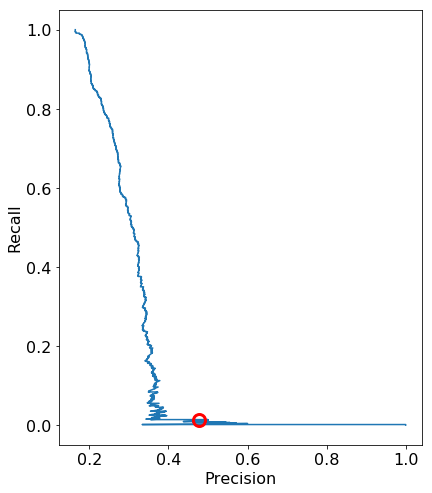

In [808]:
# y_scores = rf_clf.decision_function(X_test)
y_scores = lr.predict_proba(X_test_scaled)

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])
closest_zero = np.argmin(np.abs(thresholds-0.5))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(8,8))
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

AUC: 0.711


/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


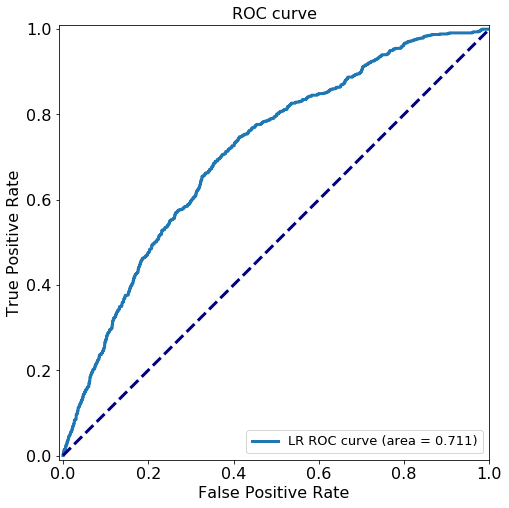

In [809]:

fpr, tpr, _ = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LR ROC curve (area = {:0.3f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

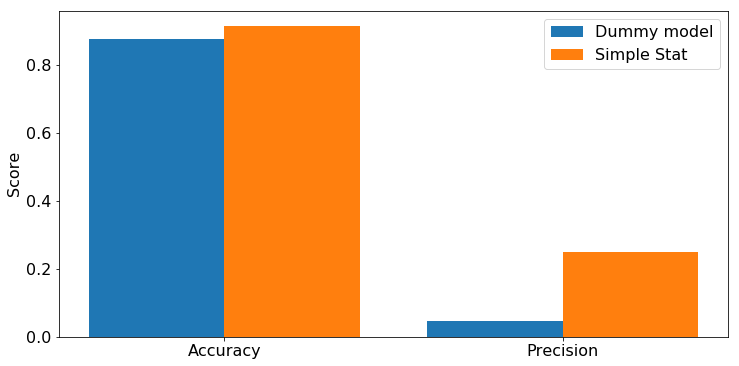

In [568]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

# days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
# days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
# days_frac = np.divide(days_cancelled, days_total)
# x=days_frac.index.values
# week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dummy = (dummy_accuracy, dummy_precision)
stat = (stat_accuracy, stat_precision)
# rf = (rf_accuracy, rf_precision)
values = ['Accuracy', 'Precision']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar([-0.2,0.8],dummy, align='center', width=0.4, label='Dummy model')
ax.bar([0.2,1.2],stat, align='center', width=0.4, label='Simple Stat')
# ax.bar([0.25,1.25],rf, align='center', width=0.5, label='RF model')
ax.set_ylabel('Score')
ax.set_xticks([0,1])
ax.set_xticklabels(values, rotation = 0)

plt.legend()

plt.savefig('plots/acc_and_precision_compare_new.png',format='png')
plt.show()



In [810]:
test_evaluation = features_test.copy()

test_evaluation['y_pred_thresh'] = y_pred_thresh

curr_predicted = test_evaluation[test_evaluation['y_pred_thresh']==1]['curr']
sum(curr_predicted=='BTC')

0

In [811]:
sug_freq = []

for c in top_curr:
    sug_freq.append(sum(curr_predicted==c))
    
df_sug_freq = pd.DataFrame(
    {'top_curr': top_curr,
     'sug_freq': sug_freq
    })        
df_sug_freq.sort_values(by='sug_freq', inplace=True, ascending=False)

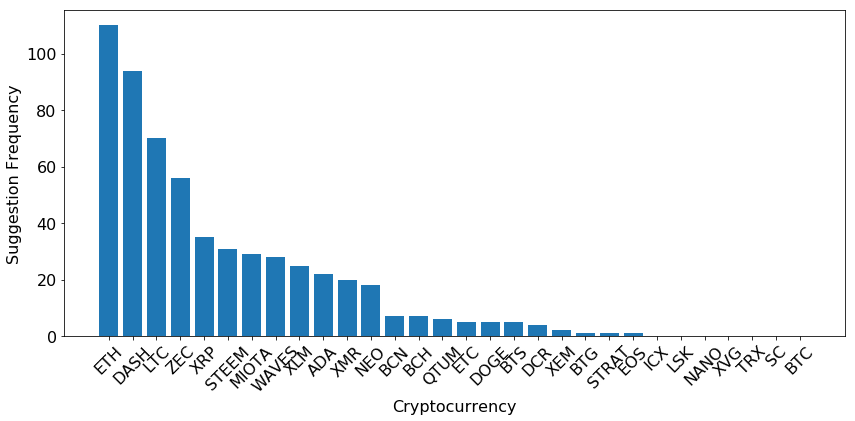

In [812]:
fig, ax1 = plt.subplots(figsize = (14,6))

x = df_sug_freq['top_curr']#.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),df_sug_freq['sug_freq'], align='center')

ax1.set_xlabel('Cryptocurrency')
ax1.set_ylabel('Suggestion Frequency')

plt.show()

In [751]:
y_pred_thresh

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [851]:
test_evaluation = features_test.copy()

test_evaluation['y_pred_thresh'] = y_pred_thresh
test_evaluation['y_dummy'] = y_dummy_predictions

lr_test_eval = test_evaluation[test_evaluation['y_pred_thresh']==1]
lr_avg_delta_future_risk = np.mean(lr_test_eval['delta_future_risk'])
lr_avg_delta_future_er = np.mean(lr_test_eval['delta_future_er'])

lr_std_delta_future_risk = np.std(lr_test_eval['delta_future_risk'])
lr_std_delta_future_er = np.std(lr_test_eval['delta_future_er'])

# dummy_test_eval = test_evaluation[test_evaluation['y_dummy']==1]
# dummy_avg_delta_future_risk = np.mean(dummy_test_eval['delta_future_risk'])
# dummy_avg_delta_future_er = np.mean(dummy_test_eval['delta_future_er'])

simple_risk_test_eval = test_evaluation[test_evaluation['simple_risk_top5']==1]
simple_risk_avg_delta_future_risk = np.mean(simple_risk_test_eval['delta_future_risk'])
simple_risk_avg_delta_future_er = np.mean(simple_risk_test_eval['delta_future_er'])

simple_er_test_eval = test_evaluation[test_evaluation['simple_er_top5']==1]
simple_er_avg_delta_future_risk = np.mean(simple_er_test_eval['delta_future_risk'])
simple_er_avg_delta_future_er = np.mean(simple_er_test_eval['delta_future_er'])

dummy_std_delta_future_risk = np.std(dummy_test_eval['delta_future_risk'])
dummy_std_delta_future_er = np.std(dummy_test_eval['delta_future_er'])

simple_risk_std_delta_future_risk = np.std(simple_risk_test_eval['delta_future_risk'])
simple_risk_std_delta_future_er = np.std(simple_risk_test_eval['delta_future_er'])

simple_er_std_delta_future_risk = np.std(simple_er_test_eval['delta_future_risk'])
simple_er_std_delta_future_er = np.std(simple_er_test_eval['delta_future_er'])

print(dummy_avg_delta_future_risk, simple_avg_delta_future_risk, lr_avg_delta_future_risk)
print(dummy_avg_delta_future_er, simple_avg_delta_future_er, lr_avg_delta_future_er)

0.058126283414071264 -0.10181572749201592 -0.2533838261064668
-0.048898001464305695 -0.03343883888056406 0.03855198176711229


In [852]:
print(dummy_avg_delta_future_risk, simple_avg_delta_future_risk, lr_avg_delta_future_risk)
print(dummy_std_delta_future_risk, simple_std_delta_future_risk, lr_std_delta_future_risk)

0.058126283414071264 -0.10181572749201592 -0.2533838261064668
0.12877824670835025 0.11711688774972115 0.31422685163210895


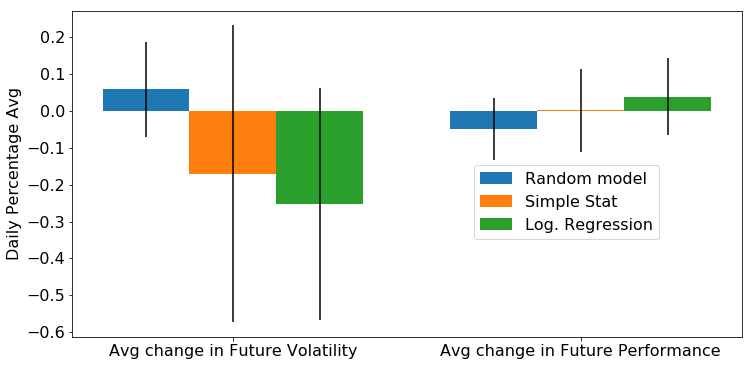

In [854]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

# days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
# days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
# days_frac = np.divide(days_cancelled, days_total)
# x=days_frac.index.values
# week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

lr = (lr_avg_delta_future_risk, lr_avg_delta_future_er)
dummy = (dummy_avg_delta_future_risk, dummy_avg_delta_future_er)
stat_risk = (simple_risk_avg_delta_future_risk, simple_risk_avg_delta_future_er)
stat_er = (simple_er_avg_delta_future_risk, simple_er_avg_delta_future_er)

lr_std = (lr_std_delta_future_risk, lr_std_delta_future_er)
dummy_std = (dummy_std_delta_future_risk, dummy_std_delta_future_er)
stat_risk_std = (simple_risk_std_delta_future_risk, simple_risk_std_delta_future_er)
stat_er_std = (simple_er_std_delta_future_risk, simple_er_std_delta_future_er)

rf = (rf_avg_delta_future_risk, rf_avg_delta_future_er)
values = ['Avg change in Future Volatility', 'Avg change in Future Performance']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar([-0.25,0.75],dummy, yerr = dummy_std, align='center', width=0.25, label='Random model')
ax.bar([0,1],stat_risk, yerr = stat_risk_std, align='center', width=0.25, label='Simple Stat')
ax.bar([0.25,1.25],lr, yerr= lr_std, align='center', width=0.25, label='Log. Regression')

# ax.bar([-0.25,0.75],dummy, align='center', width=0.25, label='Random model')
# ax.bar([0,1],stat_risk, align='center', width=0.25, label='Simple Stat')
# ax.bar([0.25,1.25],lr, align='center', width=0.25, label='Log. Regression')
ax.set_ylabel('Daily Percentage Avg')
ax.set_xticks([0,1])
ax.set_xticklabels(values, rotation = 0)

plt.legend(loc=(0.6,0.3))

# plt.savefig('plots/avg_change_risk_and_er_compare_new.png',format='png')
plt.show()


In [176]:
scalerfile = 'scaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))

thresh = 0.64


def suggest_curr(portfolio, weights, clf, top_curr, market_caps, df2_train_period):
    initial_er = []
    initial_risk = []
    newp_er = []
    newp_risk = []
    delta_er = []
    delta_risk = []
    correlation = []
    cointegration = []
    addition_er = []
    addition_performance = []
    addition_std = []
    addition_marketcap = []
    curr = []
    
    ini_er, ini_risk = er_and_risk(portfolio, len(portfolio), weights, df2_train_period)
    future_er, future_risk = er_and_risk(portfolio, len(portfolio), weights, df2_test_period)
    for c in top_curr:
        if(c in portfolio):
            continue
        
        new_portfolio = portfolio.copy()
        new_portfolio.append(c)
        new_weights = []
        for w in weights:
            new_weights.append(w*(1/1.2))
        new_weights.append(1-sum(new_weights))

        num = len(new_portfolio)
        new_er, new_risk = er_and_risk(new_portfolio, num, new_weights, df2_train_period)

        curr.append(c)
        
        initial_er.append(ini_er)
        initial_risk.append(ini_risk)
        newp_er.append(new_er)
        newp_risk.append(new_risk)
        delta_er.append(new_er-ini_er)
        delta_risk.append(new_risk-ini_risk)
        
        addition_er.append(np.mean(df2_train_period[c]))
        addition_std.append(np.std(df2_train_period[c]))
        
        portfolio_performance = pd.Series([])
        for k in range(len(portfolio_weights[0])):
            new = portfolio_weights[0][k]*df2_train_period[random_portfolios[0][k]]
            portfolio_performance = portfolio_performance.add(new,fill_value=0)
        
        corr = portfolio_performance.corr(df2_train_period[c])
        coin = ts.coint(portfolio_performance, df2_train_period[c])
        correlation.append(corr)
        cointegration.append(coin[0])
        
        #mc = df_train_period[df_train_period['Symbol']==c]['Market Cap'].iloc[-1]
        mc = market_caps[market_caps['symbol']==c]['market_cap'].values[0]
        addition_marketcap.append(mc)
        
    features = pd.DataFrame(
        {'curr': curr,
         'initial_er': initial_er,
         'initial_risk':initial_risk,
         'newp_er': newp_er,
         'newp_risk': newp_risk,
         'delta_er': delta_er,
         'delta_risk': delta_risk,
         'addition_er': addition_er,
         'addition_std': addition_std,
         'correlation': correlation,
         'cointegration': cointegration,
         'addition_marketcap': addition_marketcap,
           })
    X = features[['initial_er', 'initial_risk', 'delta_er', 'delta_risk', 
             'correlation', 'cointegration']]
    
    X_scaled = scaler.transform(X)
       
    probs = pd.DataFrame(lr.predict_proba(X_scaled))
    features['probs'] = probs[1]
    features = features[features[probs]>thresh]
    features.sort_values(by='probs', ascending=False, inplace=True)
       
    return features[0:5]

In [180]:
portfolio_1 = ['ICX', 'BTC', 'BTS', 'LSK', 'XMR']
weights_1 = [0.3, 0.2, 0.1, 0.3, 0.1]

suggest_curr(portfolio_1, weights_1, gb_clf, top_curr, market_caps, df2_train_period)

,curr,initial_er,initial_risk,newp_er,newp_risk,delta_er,delta_risk,addition_er,addition_std,correlation,cointegration,addition_marketcap,probs
4,LTC,-1.161602,9.612195,-1.067220,9.192502,0.094383,-0.419694,-0.595307,8.484617,0.755786,-7.051721,1.263972e+10,0.315931
0,XRP,-1.161602,9.612195,-1.330123,9.439420,-0.168521,-0.172776,-2.172730,11.166069,0.736339,-5.735492,8.894588e+10,0.115372
13,XVG,-1.161602,9.612195,-1.509731,9.645264,-0.348128,0.033068,-3.250372,13.068022,0.507083,-7.784958,3.195983e+09,0.076930
2,BCH,-1.161602,9.612195,-1.258315,9.449460,-0.096712,-0.162735,-1.741876,9.926753,0.765989,-1.322326,4.280479e+10,0.026071
1,ETH,-1.161602,9.612195,-0.980118,9.167340,0.181484,-0.444855,-0.072699,7.573273,0.726995,-3.391356,7.307577e+10,0.023380


In [558]:

from sklearn.neural_network import MLPClassifier

nnclf = MLPClassifier(hidden_layer_sizes = [50,50], solver='lbfgs', alpha=0.3, activation='relu',
                     max_iter = 100, random_state = 47).fit(X_train_scaled, y_train)

y_predicted = nnclf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.000
Precision: 0.000
Accuracy: 0.952
F1: 0.000
[[4865    1]
 [ 243    0]]


In [559]:

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, learning_rate = 0.1, 
                                 random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.066
Precision: 0.410
Accuracy: 0.951
F1: 0.113
[[4843   23]
 [ 227   16]]
Feature importances: [0.150 0.216 0.272 0.362]


In [560]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train_scaled, y_train)

y_predicted = nbclf.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.000
Precision: 0.000
Accuracy: 0.952
F1: 0.000
[[4866    0]
 [ 243    0]]


/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# clf = SVC(kernel='rbf')
# grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]}
# #grid_values = {'gamma': [1, 3, 10, 30, 100, 300, 1000], 'C': [10, 100, 1000, 3000, 10000]}
# #grid_values = {'gamma': [1, 1.5, 2, 3, 4, 6, 9], 'C': [1000, 10000, 30000, 100000, 300000]}

# grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'precision')
# grid_clf.fit(X_train_scaled, y_train)
# grid_clf.cv_results_['mean_test_score'].reshape(5,7)

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jcbrooks/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

array([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.319, 0.111],
       [0.000, 0.000, 0.000, 0.000, 0.327, 0.484, 0.440],
       [0.000, 0.000, 0.000, 0.162, 0.324, 0.483, 0.365],
       [0.000, 0.000, 0.328, 0.328, 0.474, 0.448, 0.299]])